## Ejercisio de regresión lineal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
## cargamos el csv
data=pd.read_csv("archivos/publicidad.csv")
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [4]:
## usando librerias para la regresion lineal
import statsmodels.formula.api as smf

In [5]:
## crear modelo lineal
lm=smf.ols(formula="Sales~TV", data=data).fit() 
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## el modelo lineal productivo sería
> por cada dolar gastado en TV generá esa cantidad de ventas
>
>sales=7.032594+0.047537*TV

In [6]:
## P valores para saber el nivel de sicnificancia, podemos asegurar que el corte no es cero
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [7]:
## obtener R2 R cuadrada, nos dice que tanto se parecen los datos
## los datos predictorios y los datos del modelo
lm.rsquared

0.611875050850071

In [8]:
## r2 ajustada
lm.rsquared_adj

0.6099148238341623

In [9]:
## resumen
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           1.47e-42
Time:                        09:19:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
## predecir los datos
prediccion=lm.predict(pd.DataFrame(data["TV"]))
data_modelo=pd.DataFrame({
    "TV": data["TV"],
    "Prediccion": prediccion
})
data_modelo

,TV,Prediccion
0,230.1,17.970775
1,44.5,9.147974
2,17.2,7.850224
3,151.5,14.234395
4,180.8,15.627218
...,...,...
195,38.2,8.848493
196,94.2,11.510545
197,177.0,15.446579
198,283.6,20.513985


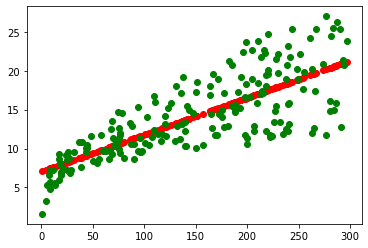

In [11]:
%matplotlib inline
plt.plot(data["TV"], data_modelo["Prediccion"], "ro")
plt.plot(data["TV"], data["Sales"], "go")

In [12]:
data["pred"]=lm.params[0]+lm.params[1]*data["TV"]
data.head()

,TV,Radio,Newspaper,Sales,pred
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


In [13]:
data["RSE"]=(data["Sales"]-data["pred"])**2
SSD=np.sum((data["Sales"]-data["pred"])**2)
## suma de los cuadrados de las diferencias
print(SSD)
RSE=np.sqrt(SSD/(len(data)-2))
RSE

2102.5305831313512


3.2586563686504624

In [14]:
## promedio de las ventas
promedio_ventas=data["Sales"].mean()
promedio_ventas

14.022500000000003

In [15]:
error=RSE/promedio_ventas
error

0.23238768897489476

In [16]:
## porcentaje de error en una predicción y el mismo dato
## varianza del modelo que no queda explicada
error

0.23238768897489476

In [17]:
## modelo de regresión multiple
## se tienen diferentes coeficientes para cada una de las variables
## minimizar la minima de los cuadrados
## sales tv
## sales radio
## sales tv radio
## sales tv newspaper
## sales radio tv
## K número de variables predictorias
## eliminar aquellas variables con p valor alto, todas las que esten menos de 0.5
## agregar una variable que aumente el valor del r cuadrado
## r cuadrado ajustado nos aydua cuando vamos incorporando más variables al modelo
## cada que añadimos una variable debe aumentar el valor de r cuadrado
## selcción adelante empezar con un modelo nulo, empezar a añadir variables predictorias
## la que tenga menor suma de los cuadrados residuales será la primera en añadirse al modelo
## si el p valor es pequeño y el r cuadrado sube entonces se ira aumentando al modelo

## modelo hacia atras, planeta tener todas las variables
## se les va descargando, si el p valor es demasiado grande 
## si el quitar la variable no fecta el r2 cuadrado entonces es removida
## puede ocurrir que el p valor sea alto pero que el r cuadrado ajustado se mantiene o baja mucho, no conviene quitarla


In [18]:
## añadir newspaper al modelo
## predecir las ventas en funcion de la tv más newspaper
lm2=smf.ols(formula="Sales~TV+Newspaper", data=data).fit()

In [19]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [20]:
## son bastante pequeños por lo tanto no son nulos
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

## modelo de prediccion
> ventas=5.774948+0.046901TV+0.044219Newspaper

Ha subido un poco la r2 lo que sicnifica que los datos predichos se acercan más al los datos evaludados

In [21]:
lm2.rsquared_adj

0.6422399150864777

In [22]:
lm2.rsquared

0.6458354938293271

In [23]:
ventas_prediccion=lm2.predict(data[["TV", "Newspaper"]])

In [24]:
ventas_prediccion

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

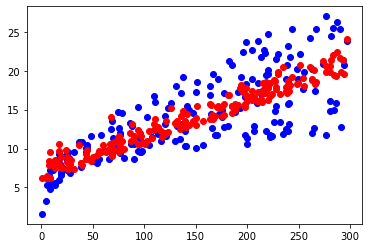

In [25]:
%matplotlib inline
plt.plot(data["TV"], data["Sales"], "bo")
plt.plot(data["TV"], ventas_prediccion, "ro")

In [26]:
## calcular el error cuadratico medio, cuan alejado esta la prediccion con el dato
## la suma de los cuadrados de las diferencias
SSD=sum((data["Sales"]-ventas_prediccion)**2)
SSD

1918.561811896827

In [27]:
## desviación típica de los residuos el dos es el número de variables utilizadas
RSE=np.sqrt(SSD/(len(data)-2-1))
RSE

3.120719860252885

In [28]:
## calcular el porcentaje de error
error=RSE/data["Sales"].mean()
error

0.22255089037282116

In [29]:
## resumen de los datos
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           3.95e-45
Time:                        09:19:37   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusión
> Agregar la variable de newspaper no afecta sicnificativamente al modelo

## Probar con la variable de radio

In [30]:
prediccion_radio_tv=smf.ols(formula="Sales~TV+Radio", data=data).fit()

In [31]:
prediccion_radio_tv.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

## Modelo
ventas=2.921100+2.921100TV+0.187994*Radio

In [32]:
ventas_prediccion_radio_tv=prediccion_radio_tv.predict(data[["TV", "Radio"]])
ventas_prediccion_radio_tv

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

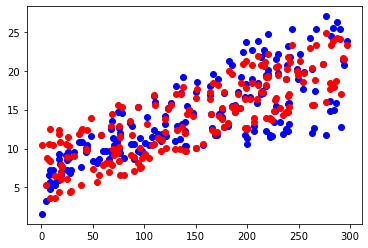

In [33]:
%matplotlib inline
plt.plot(data["TV"], data["Sales"], "bo")
plt.plot(data["TV"], ventas_prediccion_radio_tv, "ro")

In [34]:
## Obtener la suma de la diferencia de los cuadrados
SSD=np.sum((ventas_prediccion_radio_tv-data["Sales"])**2)
SSD

556.9139800676184

In [35]:
## desviacion tipica de los residuos
SSE=np.sqrt(SSD/(len(data)-2-1))
SSE

1.681360912508001

In [36]:
error=SSE/data["Sales"].mean()
error

0.11990450436855059

In [37]:
prediccion_radio_tv.rsquared

0.8971942610828957

In [38]:
prediccion_radio_tv.rsquared_adj

0.8961505479974429

In [39]:
prediccion_radio_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           4.83e-98
Time:                        09:19:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Crear un modelo con todas las variables

In [40]:
ml3=smf.ols(formula="Sales~TV+Newspaper+Radio", data=data).fit()

In [41]:
ml3.params

Intercept    2.938889
TV           0.045765
Newspaper   -0.001037
Radio        0.188530
dtype: float64

## Modelo
> ventas=2.938889+0.045765TV+-0.001037Newspaper+0.188530Radio

In [42]:
prediccion_lm3=ml3.predict(data[["TV", "Newspaper", "Radio"]])
prediccion_lm3

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

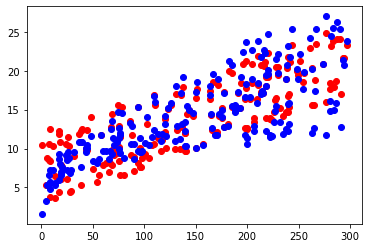

In [43]:
%matplotlib inline
plt.plot(data["TV"], prediccion_lm3, "ro")
plt.plot(data["TV"], data["Sales"], "bo")

In [44]:
## suma del cuadrado de los residuos
RSD=np.sum((prediccion_lm3-data["Sales"])**2)
RSD

556.8252629021872

In [45]:
SSR=np.sum((prediccion_lm3-data["Sales"].mean())**2)
SST=np.sum((data["Sales"]-data["Sales"].mean())**2)
SSR, SST

(4860.323487097823, 5417.14875)

In [46]:
R2=SSR/SST
R2

0.897210638178954

In [47]:
RSE=np.sqrt(SSD/(len(data)-3-1))
RSE

1.6856446415208186

In [48]:
error=RSE/data["Sales"].mean()
error

0.120209994046769

In [49]:
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        09:19:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
data_original=data.loc[:, ["TV", "Radio", "Newspaper", "Sales"]]

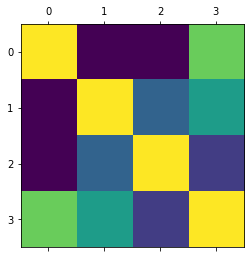

In [51]:
plt.matshow(data_original.corr())

In [52]:
data_original.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## La multicolonealidad
> en el caso de que una variable interactúe con otra dentro del modelo
> es contraproducendete, por que una afectará a otra y con ello el resultado
### T test
> se utiliza un t test para calcular, se divide la variabilidad promedio por el error
> si este valor sube el valor del t estadistico baja, por lo tanto el p valor se incrementa
> la colonealidad es un problema para tomarse en cuenta
> si existe una correlación muy fuerte es necesario ver cual de ellas ocupar en le módelo
> utilizar una matriz de correlación para saber los parés que más correlacion tienen
> ver el efecto que estos provocan en el modelo
### Factor de inflación
> se utiliza el factor de inflación de la varianza
> es una prueba muy sencilla para encontrar esa amenaza llamada multicolenealidad a travez de un estadístico
> se tratá de cuantificar una varianza en un coeficiente estimado de una variable particular
> devido a la alta correlación de dos o más de las variables predictorias
### EL factor de varianza
> el factor de varianza necesita ser calculado para cada una de las variables y si el valor es muy
> alto para una variable particular entonces este predictor necesita ser eliminado del moddelo
> en algunos casos es un parametro de la funcion
> nos proporciona información de que tan fuerte esta relacionada una variable con otra y que tanto afecta al módelo

# Multicolinealidad
### VIF factor de inflacion de la varianza
* **excelente**: el VIF es igual a 1, sicnifica sin correlación
* **medio**: el VIF el valor esta entre 1 y 5, las variables tienen correlación con otras pero pueden formar parte del módelo
* **malo**: el VIF es mayor a 5, las variables son altamente correlacionadas y necesitan ser eliminadas del módelo

In [53]:
## tenemso problemas en la variable
## newspaper=tv+radio, obtener el r cuadrado, calcular el factor de inflación de la varianza
## VIF = 1/(1-R2) esta formula se hará para cada una de las variables involucradas
## con esto tendremos razones estadísticas para desaparecer una variable
## al hacer el modelo la primera parte es para saber si esta relacionada con las otras dos
## primera parte= tiene relación con estas variables de aquí
## la TV tiene relacipon con Newspaper y radio
## TV~Newspaper+Radio

In [54]:
## Newspaper~TV+Radio -> R^2 VIF=1/(1-R^2)
newspaper_model=smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
newspaper_r2=newspaper_model.rsquared
newspaper_vif=1/(1-newspaper_r2)
newspaper_vif

1.1451873787239288

In [55]:
## TV~Newspaper+Radio -> R^2 VIF=1/(1-R^2)
tv_model=smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
tv_r2=tv_model.rsquared
tv_vif=1/(1-tv_r2)
tv_vif

1.0046107849396502

In [56]:
## Radio~Newspaper+TV -> R^2 VIF=1/(1-R^2)
radio_model=smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
radio_r2=radio_model.rsquared
radio_vif=1/(1-radio_r2)
radio_vif

1.1449519171055353

### conclusion
> la Radio y Newspaper tienen correlación entre ellas pero no con la tv
> 
>esto por que tienen VIFs muy parecidos, desechamos la Newspaper por que afecta de forma negativa al módelo
>
>**El módelo de TV y Radio tienen el mejor rendimiento y son las variables que se ocupan para el módelo**

## Validando módelo